In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import math

In [42]:
warnings.filterwarnings("ignore")

In [60]:
data = pd.read_csv("train-2.csv")

In [61]:
len(data)

31641

In [62]:
len(data.loc[data.Plx < 0])

1145

In [63]:
labels = {i[1]: i[0] for i in enumerate(data.SpType.unique())}

In [64]:
(len(labels))

1842

In [65]:
data.SpType.nunique()

1842

In [66]:
data.SpType = data.SpType.apply(lambda x: labels[x])

In [67]:
data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,6.901420,24.569658,0.862829,0.737416,0,20.449126,1
1,4.334196,2.198947,0.593309,1.153210,1,13.043324,0
2,7.873019,11.750465,0.616568,0.589166,2,17.736492,1
3,8.110014,2.143815,0.848508,1.322107,3,15.592469,0
4,8.025193,4.165622,0.899296,1.141646,4,16.379680,0
...,...,...,...,...,...,...,...
31636,7.561113,0.692340,0.843319,0.252874,192,12.542120,0
31637,8.078011,3.002784,0.689891,0.971966,9,15.379710,0
31638,7.065964,7.820498,0.885794,0.435381,190,16.737442,1
31639,8.685452,2.643033,1.064647,0.988600,14,14.859882,0


In [68]:
data.Amag = data.Amag.apply(lambda x: math.ceil(x))
data.Vmag = data.Vmag.apply(lambda x: math.ceil(x))
data.Plx = data.Plx.apply(lambda x: math.ceil(x))
data.e_Plx = data.e_Plx.apply(lambda x: math.ceil(x))
data["B-V"] = data["B-V"].apply(lambda x: math.ceil(x))

In [69]:
data["b-v2"] = data["B-V"] * 2

In [70]:
data = data.drop(["e_Plx", "Plx", "Vmag", "Amag"], axis=1)

In [71]:
y = data['TargetClass']
X = data.drop(columns=['TargetClass'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

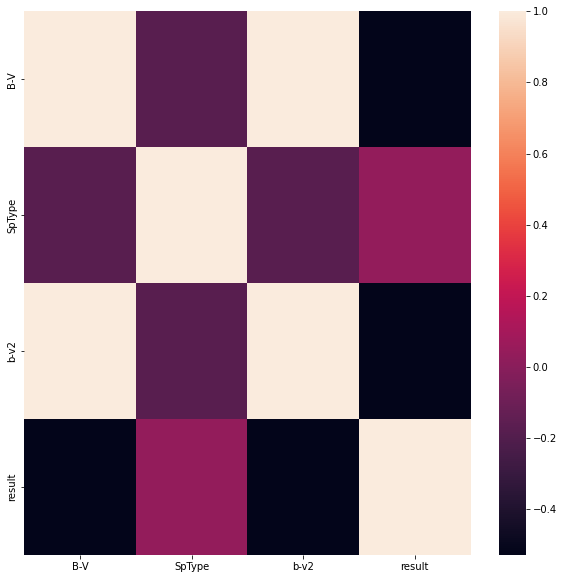

In [72]:
fig = plt.figure(figsize = (10, 10))
X_test2 = X_test
X_test2["result"] = y_test
data_ploting = X_test2.corr(method= 'pearson')
sns.heatmap(data_ploting, linecolor='black')
plt.show()

In [73]:
%%time
xgb = XGBClassifier(n_estimators=300)
xgb.fit(X_train, y_train)

CPU times: user 5.1 s, sys: 1.99 s, total: 7.09 s
Wall time: 1.39 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [74]:
X_test = X_test.drop("result", axis=1)

In [75]:
pred = xgb.predict(X_test)

In [59]:
# рассчитываем ROC AUC
auc1 = roc_auc_score(y_test, pred)
print('ROC AUC=%.3f' % (auc1))

ROC AUC=0.967
